In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline


Import PANNET program

In [ ]:
from Utils_cv import *
initialization()

Read the time series and normalize it

In [22]:
Sunspot=pd.read_excel("Sunspot_series.xls", header=None)[1].values[0:-1]
Sc=MinMaxScaler(feature_range=(-.7, .7))
Sunspot_normed=Sc.fit_transform(Sunspot.reshape(-1, 1))
Data=Sunspot_normed.copy()     # normalized data

n_training=221                 # number of training samples

y_a=Sc.inverse_transform(Data) # actual data
Train_orig=y_a[:n_training]    # Training/validtion data
Test_orig=y_a[n_training:]     # Test data

Run the evolutionary algorithm

In [23]:
MinFit,MaxFit,AvgFit,UNI,Valerror,test_MSE,Network,X0=Evolution(Data,y_a,n_training,Sc)

100%|██████████████████████████████████████| 2000/2000 [19:52<00:00,  1.81it/s]


Monitor training/validation/test errors

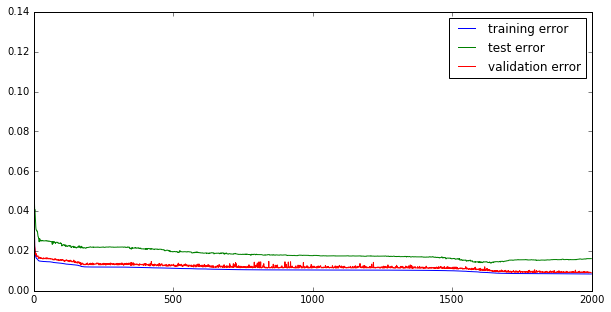

In [24]:
plt.figure(figsize=(10,5))
plt.plot(MinFit,label='training error')
plt.hold('on')
plt.plot(test_MSE,label='test error')
plt.plot(Valerror,label='validation error')
plt.legend()
plt.savefig('evolution'+ '.png')

Select a network in a generation with minimum validation error

In [25]:
x_test=np.argmin(test_MSE)
x_valid=np.argmin(Valerror)
Finalnet=Network[x_valid]
Finalnet_t=Network[x_test]

Plot the prediction of time series using the selected network

x_valid= 1989 ,TEST_MAE= 12.6041175151 ,TEST_MSE= 298.005226667 TEST_R= 0.943309165398
x_test= 1639 ,TEST_MAE_t= 11.5565175628 ,TEST_MSE_t= 255.971619921 TEST_R_t= 0.9491647721


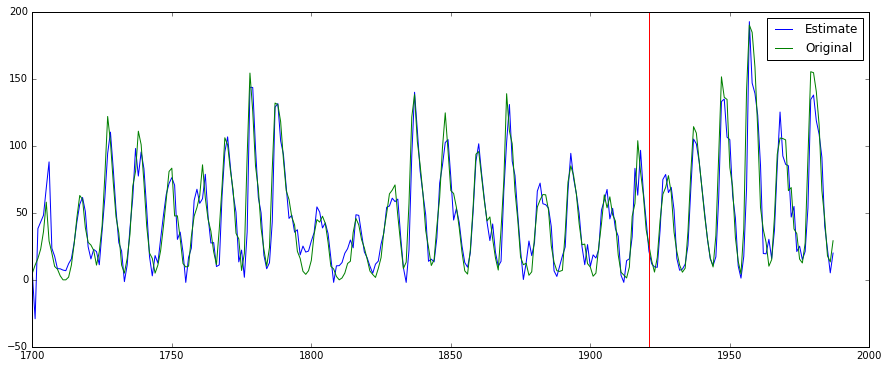

In [26]:
y_p,Finalnet=Evaluate([Finalnet],1,X0,Data,Sc)
Test_predict=y_p[n_training:]  

TEST_MAE=MAE(Test_orig,Test_predict)
TEST_MSE=MSE(Test_orig,Test_predict)
TEST_R=R(Test_orig,Test_predict)
print('x_valid=',x_valid, ',TEST_MAE=',TEST_MAE,',TEST_MSE=',TEST_MSE,'TEST_R=',TEST_R)
###-----------
y_p_t,Finalnet_t=Evaluate([Finalnet_t],1,X0,Data,Sc)
Test_predict_t=y_p_t[n_training:]  

TEST_MAE_t=MAE(Test_orig,Test_predict_t)
TEST_MSE_t=MSE(Test_orig,Test_predict_t)
TEST_R_t=R(Test_orig,Test_predict_t)

print('x_test=',x_test, ',TEST_MAE_t=',TEST_MAE_t,',TEST_MSE_t=',TEST_MSE_t,'TEST_R_t=',TEST_R_t)
######---------


Gragh_pannet(Finalnet)    

plt.figure(figsize=[15,6])
plt.plot(np.arange(1700,1987+1),y_p,label='Estimate')
plt.hold('on')
plt.plot(np.arange(1700,1987+1),Sunspot,label='Original')
plt.legend()
plt.axvline(x=1700+221,color='r') 
plt.savefig('data'+'.png')